In [1]:
class TreeNode():
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


In [3]:
def generate_random_tree_by_mid(mid):
    if len(mid) == 0:
        return None
    root = TreeNode(random.choice(mid))
    index = mid.index(root.val)
    root.left = generate_random_tree_by_mid(mid[:index])
    root.right = generate_random_tree_by_mid(mid[index+1:])
    return root


In [17]:
import random
def generate_random_tree(n, isBST = False):
    numbers = [x for x in range(1, 200)]
    mid = []
    for _ in range(n):
        mid.append(random.choice(numbers))
    if isBST:
        mid.sort()
    else:
        random.shuffle(mid)

    root = generate_random_tree_by_mid(mid)
    return root


In [8]:

def get_left_width(root):
    '''Get the root left width '''
    return get_width(root.left)

def get_right_width(root):
    '''Get the root right width '''
    return get_width(root.right)

def get_width(root):
    '''Get the width of the tree'''
    if root == None:
        return 0
    return get_width(root.left) + 1 + get_width(root.right)

def get_height(root):
    if root == None:
        return 0
    return max(get_height(root.left), get_height(root.right)) + 1


In [9]:
d_hor = 4   #Node horizontal distance
d_vec = 8   #nodevertical distance
radius = 2  #node radius

In [10]:
def get_w_h(root):
    '''Return the width and height of the tree '''
    w = get_width(root)
    h = get_height(root)
    return w, h

In [21]:
def draw_a_node(x, y, val, ax):
    '''Draw a node'''
    c_node = plt.Circle((x,y), radius=radius, color='green')
    ax.add_patch(c_node)
    plt.text(x, y, '%d' % val, ha='center', va= 'bottom',fontsize=11)

def draw_a_edge(x1, y1, x2, y2, r=radius):
    '''Draw an edge'''
    x = (x1, x2)
    y = (y1, y2)
    plt.plot(x, y, 'k-')


In [12]:
def create_win(root):
    '''Create window'''
    WEIGHT, HEIGHT = get_w_h(root)
    WEIGHT = (WEIGHT+1)*d_hor
    HEIGHT = (HEIGHT+1)*d_vec
    fig = plt.figure(figsize=(11, 9))
    ax = fig.add_subplot(111)
    plt.xlim(0, WEIGHT)
    plt.ylim(0, HEIGHT)

    x = (get_left_width(root) + 1) * d_hor #x, y is the first node coordinate to be drawn, determined by the width of its left subtree
    y = HEIGHT - d_vec
    return fig, ax, x, y     


In [13]:
def print_tree_by_inorder(root, x, y, ax):
    if root == None:
        return
    draw_a_node(x, y, root.val, ax)
    lx = rx = 0
    ly = ry = y - d_vec
    if root.left != None:
        lx = x - d_hor * (get_right_width(root.left) + 1)   #x-The width of the right side of the left subtree
        draw_a_edge(x, y, lx, ly, radius)
    if root.right != None:
        rx = x + d_hor * (get_left_width(root.right) + 1)   #x-The width of the left side of the right subtree
        draw_a_edge(x, y, rx, ry, radius)
    #recursive printing    
    print_tree_by_inorder(root.left, lx, ly, ax)
    print_tree_by_inorder(root.right, rx, ry, ax)


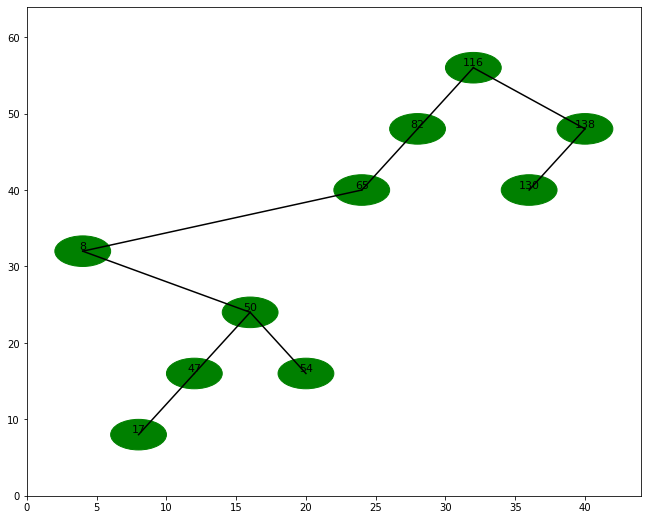

In [24]:
import matplotlib.pyplot as plt
def show_BTree(root):
    _, ax, x, y = create_win(root)
    print_tree_by_inorder(root, x, y, ax)
    plt.show()
    
def main():
    root = generate_random_tree(10, True)
    show_BTree(root)


if __name__ == '__main__':
    main()
